In [7]:
fparcelles="ppm-k-clapiers.csv"  # fichier des parcelles pour une commune Clapiers code commune 34077
# en principe extractible avec une requête curl  elasticsearch qui permettra d'industrialiser le processus
# cf. doc API https://opendata.koumoul.com/datasets/parcelles-des-personnes-morales
# ici fichier csv téléchargé à la main (le fichier geojson semble incomplet, le csv semble complet?)
fcontours="cadastre-34077-parcelles.json" #fichier des contours https://cadastre.data.gouv.fr/datasets/cadastre-etalab

In [9]:
import json
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import shape
import contextily as cx

In [53]:
contours = pd.read_json( fcontours )['features']
contours=pd.DataFrame(contours)
contours['geometry']=contours['features'].apply(lambda x: x['geometry'])
contours['geometry']=contours['geometry'].apply(shape)
contours['id']=contours['features'].apply(lambda x: x['id'])
del contours['features']

In [56]:
contoursgeo = gpd.GeoDataFrame(contours).set_geometry('geometry')

In [60]:
parcelles=pd.read_csv(fparcelles)[["Nom Commune","Code parcelle","Groupe personne"]]
parcelles.columns=["Commune","id","Groupe"]

In [87]:
x=parcelles['Groupe'].unique()
# TODO : mettre des couleurs
import random
r = lambda: random.randint(0,255)
print('#%02X%02X%02X' % (r(),r(),r()))
y={}
for p in x:
    y[p]=format('#%02X%02X%02X' % (r(),r(),r()))

#01A791


In [89]:
parcelles['color']=parcelles['Groupe'].apply(lambda x:y[x])

In [66]:
parcelles=pd.merge(contoursgeo,parcelles,on="id")

In [74]:
parcelles=parcelles.set_crs(epsg=4326)

In [75]:
parcelles.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

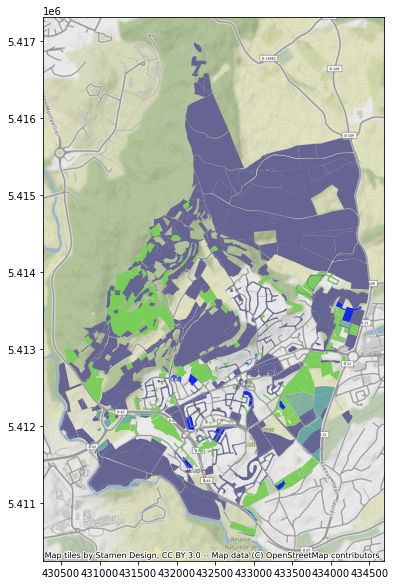

In [92]:
ax = parcelles.to_crs(epsg=3857).plot(figsize=(10, 10),color=parcelles['color'])
cx.add_basemap(ax)

<Figure size 432x288 with 0 Axes>